<a href="https://colab.research.google.com/github/Viraj-Kadlag05/Hoya_Plant_Disease_Predictor/blob/main/ML_model_for_Plant_Disease_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!ls

gdrive	sample_data


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [5]:
pwd

'/content'

In [6]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [7]:
!ls

 kaggle.json				 'Plant Disease Dataset'
'new plant diseases dataset(augmented)'   test
'New Plant Diseases Dataset(Augmented)'


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [9]:
image_size=224
train_gen = keras.preprocessing.image.ImageDataGenerator()
test_gen = keras.preprocessing.image.ImageDataGenerator()

In [10]:
train_gen = train_gen.flow_from_directory("/content/gdrive/MyDrive/Kaggle/Plant Disease Dataset/Train", target_size=(image_size,image_size), class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest')

Found 4254 images belonging to 38 classes.


In [11]:
test_gen = test_gen.flow_from_directory("/content/gdrive/MyDrive/Kaggle/Plant Disease Dataset/Valid", target_size=(image_size,image_size), class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest')

Found 1170 images belonging to 38 classes.


In [12]:
pwd

'/content/gdrive/MyDrive/Kaggle'

In [13]:
%cd /content/gdrive/MyDrive/Kaggle/Plant Disease Dataset/Train

/content/gdrive/MyDrive/Kaggle/Plant Disease Dataset/Train


In [14]:
!ls

 Apple___Apple_scab
 Apple___Black_rot
 Apple___Cedar_apple_rust
 Apple___healthy
 Blueberry___healthy
'Cherry_(including_sour)___healthy'
'Cherry_(including_sour)___Powdery_mildew'
'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
'Corn_(maize)___Common_rust'
'Corn_(maize)___healthy'
'Corn_(maize)___Northern_Leaf_Blight'
 Grape___Black_rot
'Grape___Esca_(Black_Measles)'
 Grape___healthy
'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'
'Orange___Haunglongbing_(Citrus_greening)'
 Peach___Bacterial_spot
 Peach___healthy
 Pepper__bell___Bacterial_spot
 Pepper__bell___healthy
 Potato___Early_blight
 Potato___healthy
 Potato___Late_blight
 Raspberry___healthy
 Soybean___healthy
 Squash___Powdery_mildew
 Strawberry___healthy
 Strawberry___Leaf_scorch
 Tomato___Bacterial_spot
 Tomato___Early_blight
 Tomato___healthy
 Tomato___Late_blight
 Tomato___Leaf_Mold
 Tomato___Septoria_leaf_spot
'Tomato___Spider_mites Two-spotted_spider_mite'
 Tomato___Target_Spot
 Tomato___Tomato_mosaic_virus
 Tomato__

In [15]:
Lables = train_gen.class_indices

In [16]:
train_gen.image_shape

(224, 224, 3)

In [17]:
print(Lables)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper__bell___Bacterial_spot': 18, 'Pepper__bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato_

In [18]:
type(Lables)

dict

In [19]:
Lables.keys()
labels_list = list(Lables.keys())
labels_list

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_s

In [20]:
details_list = []
for i in labels_list:
  details = i.split("___")
  details_list.append(details)
print(details_list)

[['Apple', 'Apple_scab'], ['Apple', 'Black_rot'], ['Apple', 'Cedar_apple_rust'], ['Apple', 'healthy'], ['Blueberry', 'healthy'], ['Cherry_(including_sour)', 'Powdery_mildew'], ['Cherry_(including_sour)', 'healthy'], ['Corn_(maize)', 'Cercospora_leaf_spot Gray_leaf_spot'], ['Corn_(maize)', 'Common_rust'], ['Corn_(maize)', 'Northern_Leaf_Blight'], ['Corn_(maize)', 'healthy'], ['Grape', 'Black_rot'], ['Grape', 'Esca_(Black_Measles)'], ['Grape', 'Leaf_blight_(Isariopsis_Leaf_Spot)'], ['Grape', 'healthy'], ['Orange', 'Haunglongbing_(Citrus_greening)'], ['Peach', 'Bacterial_spot'], ['Peach', 'healthy'], ['Pepper__bell', 'Bacterial_spot'], ['Pepper__bell', 'healthy'], ['Potato', 'Early_blight'], ['Potato', 'Late_blight'], ['Potato', 'healthy'], ['Raspberry', 'healthy'], ['Soybean', 'healthy'], ['Squash', 'Powdery_mildew'], ['Strawberry', 'Leaf_scorch'], ['Strawberry', 'healthy'], ['Tomato', 'Bacterial_spot'], ['Tomato', 'Early_blight'], ['Tomato', 'Late_blight'], ['Tomato', 'Leaf_Mold'], ['To

In [21]:
print(details_list[0][1])

Apple_scab


In [22]:
copy_list = details_list.copy()
print(copy_list)

[['Apple', 'Apple_scab'], ['Apple', 'Black_rot'], ['Apple', 'Cedar_apple_rust'], ['Apple', 'healthy'], ['Blueberry', 'healthy'], ['Cherry_(including_sour)', 'Powdery_mildew'], ['Cherry_(including_sour)', 'healthy'], ['Corn_(maize)', 'Cercospora_leaf_spot Gray_leaf_spot'], ['Corn_(maize)', 'Common_rust'], ['Corn_(maize)', 'Northern_Leaf_Blight'], ['Corn_(maize)', 'healthy'], ['Grape', 'Black_rot'], ['Grape', 'Esca_(Black_Measles)'], ['Grape', 'Leaf_blight_(Isariopsis_Leaf_Spot)'], ['Grape', 'healthy'], ['Orange', 'Haunglongbing_(Citrus_greening)'], ['Peach', 'Bacterial_spot'], ['Peach', 'healthy'], ['Pepper__bell', 'Bacterial_spot'], ['Pepper__bell', 'healthy'], ['Potato', 'Early_blight'], ['Potato', 'Late_blight'], ['Potato', 'healthy'], ['Raspberry', 'healthy'], ['Soybean', 'healthy'], ['Squash', 'Powdery_mildew'], ['Strawberry', 'Leaf_scorch'], ['Strawberry', 'healthy'], ['Tomato', 'Bacterial_spot'], ['Tomato', 'Early_blight'], ['Tomato', 'Late_blight'], ['Tomato', 'Leaf_Mold'], ['To

In [23]:
base_model = keras.applications.MobileNet(weights="imagenet",
                                          input_shape=(224,224,3),
                                          include_top=False,)

17227776/17225924 [==============================] - 0s 0us/step


In [24]:
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [25]:
# Freeze the base_model
base_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  
outputs = keras.layers.Dense((38),activation="softmax")(x)

mobilenet_model = keras.Model(inputs, outputs, name='leaf_disease_model_mobilenet')
mobilenet_model.summary()

Model: "leaf_disease_model_mobilenet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
mobilenet_1.00_224 (Function (None, 7, 7, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 38)                38950     
Total params: 3,267,814
Trainable params: 38,950
Non-trainable params: 3,228,864
_________________________________________________________________


In [26]:
mobilenet_model.compile(optimizer=keras.optimizers.Adam(),
                        loss=keras.losses.CategoricalCrossentropy(from_logits=True),
                        metrics=[keras.metrics.CategoricalAccuracy()])

In [28]:
#Add Callbacks, e.g. ModelCheckpoints, earlystopping, csvlogger.
from keras.callbacks import EarlyStopping

# EarlyStopping callback.
early_stop = EarlyStopping(monitor='val_loss', 
                           patience=3, 
                           verbose=1)

callbacks_list = [early_stop]

history = mobilenet_model.fit(train_gen,
                              steps_per_epoch=100,  
                              validation_data=test_gen,
                              epochs=20,
                              validation_steps=100,
                              callbacks=callbacks_list)

Epoch 1/20
100/100 [==============================] - 334s 3s/step - loss: 1.7191 - categorical_accuracy: 0.5344 - val_loss: 1.5418 - val_categorical_accuracy: 0.5983
Epoch 2/20
100/100 [==============================] - 13s 133ms/step - loss: 1.3625 - categorical_accuracy: 0.6326 - val_loss: 1.3374 - val_categorical_accuracy: 0.6308
Epoch 3/20
100/100 [==============================] - 13s 135ms/step - loss: 1.1832 - categorical_accuracy: 0.6745 - val_loss: 1.2218 - val_categorical_accuracy: 0.6521
Epoch 4/20
100/100 [==============================] - 13s 134ms/step - loss: 1.0487 - categorical_accuracy: 0.7129 - val_loss: 1.1024 - val_categorical_accuracy: 0.6991
Epoch 5/20
100/100 [==============================] - 13s 135ms/step - loss: 0.9272 - categorical_accuracy: 0.7448 - val_loss: 1.0701 - val_categorical_accuracy: 0.6974
Epoch 6/20
100/100 [==============================] - 14s 139ms/step - loss: 0.8305 - categorical_accuracy: 0.7677 - val_loss: 1.0014 - val_categorical_accur

In [29]:
mobilenet_model.evaluate(test_gen)

37/37 [==============================] - 4s 96ms/step - loss: 0.7360 - categorical_accuracy: 0.7795


[0.7359914183616638, 0.7794871926307678]

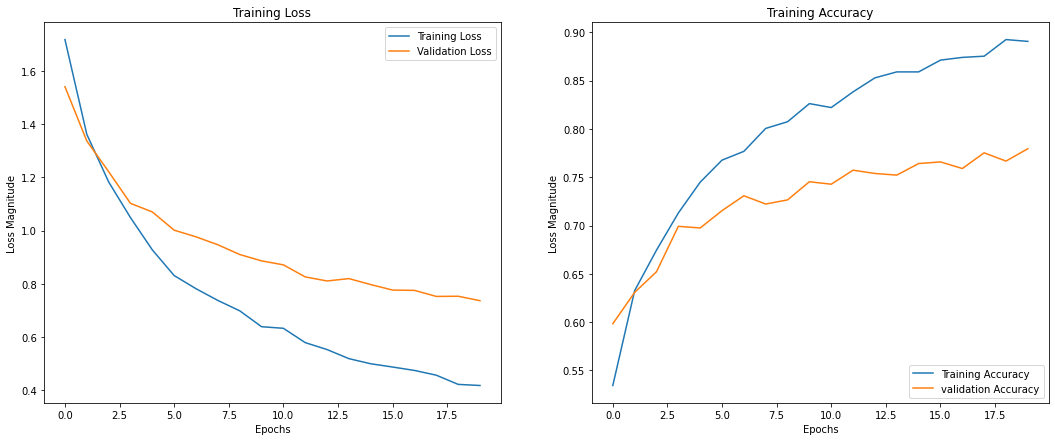

In [30]:
# Learning Curves.
# Plot Loss vs Accuracy graphs.

plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.grid(False)
plt.xlabel('Epochs')
plt.ylabel('Loss Magnitude')
plt.title('Training Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['categorical_accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_categorical_accuracy'], label = 'validation Accuracy')
plt.grid(False)
plt.xlabel('Epochs')
plt.ylabel('Loss Magnitude')
plt.title('Training Accuracy')
plt.legend(loc='lower right')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


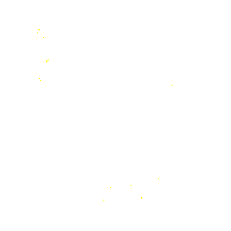

True label: Raspberry___healthy
Predicted label: Raspberry___healthy


In [41]:

x, y = next(test_gen)
image = x[0, :, :, :]
true_index = np.argmax(y[0])
plt.imshow(image)
plt.axis('off')
plt.show()

# Expand the validation image to (1, 224, 224, 3) before predicting the label
prediction_scores = mobilenet_model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + labels_list[true_index])
print("Predicted label: " + labels_list[predicted_index])

In [31]:
!pip install tensorflowjs

     |████████████████████████████████| 71kB 5.5MB/s 
     |████████████████████████████████| 112kB 11.5MB/s 
  Found existing installation: tensorflow-hub 0.11.0
    Uninstalling tensorflow-hub-0.11.0:
      Successfully uninstalled tensorflow-hub-0.11.0


In [42]:
import tensorflowjs as tfjs

In [43]:
tfjs.converters.save_keras_model(mobilenet_model, '/content/gdrive/MyDrive/Kaggle/Machine Learning Model')

/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)
